In [1]:
from GenZ import decode_moddeling, prefill_moddeling

from GenZ.system import System
import pandas as pd
from GenZ.analyse_model import get_model_df, get_summary_table

from GenZ import create_inference_mamba_prefix_model, create_inference_mamba_decode_model

In [2]:
# This will reload the imported modules (e.g. get_decode_model_characterstics) every time you execute the jupyter cells, so that you don't need to restart the notebook after updating the source codes.
%load_ext autoreload
%autoreload 2   

In [3]:
system = System(frequency=1000 , flops=2000, off_chip_mem_size=(80*1024), compute_efficiency=0.8, memory_efficiency=0.8,
                     offchip_mem_bw=3500, bits='int8', external_mem_bw=128, interchip_mem_bw=256, interchip_link_latency=2)

In [11]:
################################################################################################## #
### Model Characterization Calculation
################################################################################################## #
model_prefill = create_inference_mamba_prefix_model(input_sequence_length=10,output_gen_tokens = 0 ,
                                    name='state-spaces/mamba-130m-hf')

B = 1
model_df = get_model_df(model_prefill, system, batch_size=B,  model_characterstics = True)
summary_table = get_summary_table(model_df,system, model_characterstics = True)


In [12]:
display(model_df)
display(summary_table)

,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB)
0,GEMM,"[((1, 768, 10), (3072, 768), (1, 3072, 10))]",9.839846,23.59296,0.007324,2.25,0.029297,2.286621
1,CONV1D,"((1, 10, 1536), (1536, 1, 4), (1, 10, 1536))",1.666667,0.06144,0.014648,0.005859,0.014648,0.035156
2,GEMM,"[((1, 1536, 10), (80, 1536), (1, 80, 10))]",8.837745,1.2288,0.014648,0.117188,0.000763,0.132599
3,GEMM,"[((1, 48, 10), (1536, 48), (1, 1536, 10))]",8.231511,0.73728,0.000458,0.070312,0.014648,0.085419
4,Einsum,"([1, 1536, 10], [1536, 16], [1, 1536, 10, 16])",0.860215,0.24576,0.014648,0.023438,0.234375,0.272461
5,Einsum,"([1, 1536, 10], [1, 10, 16], [1, 1536, 10, 16])",0.9406,0.24576,0.014648,0.000153,0.234375,0.249176
6,Einsum,"([1, 1536, 10, 16], [1, 1536, 10], [1, 1536, 1...",0.484848,0.24576,0.234375,0.014648,0.234375,0.483398
7,Einsum,"([1, 1536, 16], [1, 1536, 16], [1, 1536, 16])",0.333333,0.024576,0.023438,0.023438,0.023438,0.070312
8,Einsum,"([1, 1536, 16], [1, 16], [1, 1536])",0.9406,0.024576,0.023438,0.000015,0.001465,0.024918
9,Einsum,"([1, 1536, 16], [1, 1536, 16], [1, 1536, 16])",0.333333,0.024576,0.023438,0.023438,0.023438,0.070312


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB)
0,74.06592,9.165588,7.245422,7.245422,2.286621


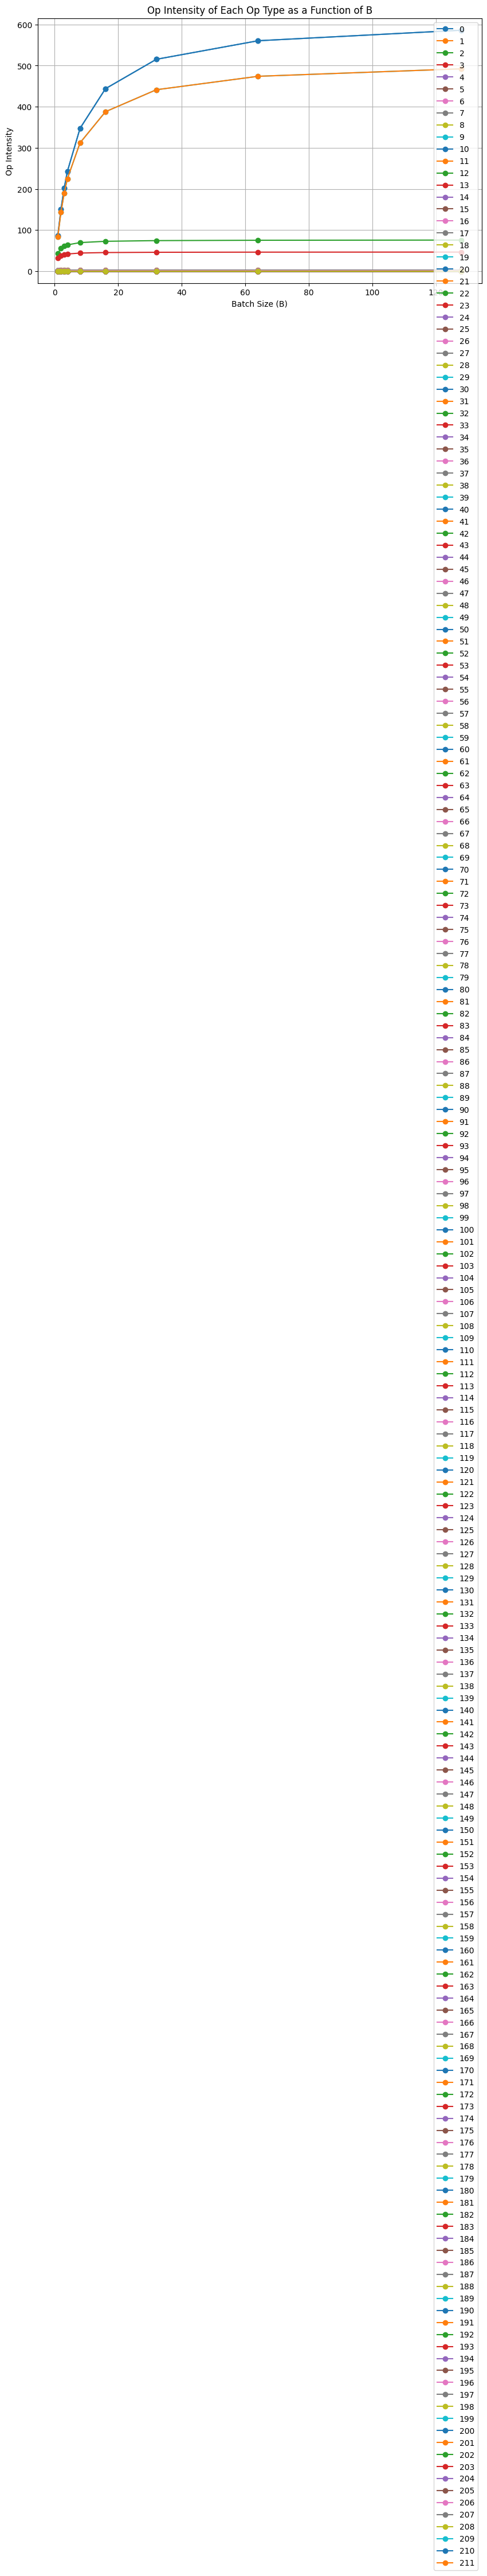

In [6]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store Op Intensity for each Op Type
op_intensity_data = {op_idx: [] for op_idx in range(len(model_df))}

# Vary B from 1 to 128
batch_sizes = [1,2,3,4,8,16,32,64,128]
for B in batch_sizes:
    model_df = get_model_df(model_prefill, system, batch_size=B, model_characterstics=True)
    for op_idx in range(len(model_df)):
        subset = model_df.loc[op_idx]
        op_intensity_data[op_idx].append(subset['Op Intensity'])

# Plotting
plt.figure(figsize=(10, 6))
for op_type, intensities in op_intensity_data.items():
    plt.plot(batch_sizes, intensities, marker='o', linestyle='-', label=op_type)

plt.xlabel('Batch Size (B)')
plt.ylabel('Op Intensity')
plt.title('Op Intensity of Each Op Type as a Function of B')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
################################################################################################## #
### Model Characterization Calculation
################################################################################################## #
model_decode = create_inference_mamba_decode_model(input_sequence_length=10000,output_gen_tokens = 0 ,
                                    name='state-spaces/mamba-130m-hf')

B = 1
model_df = get_model_df(model_decode, system, batch_size=B,  model_characterstics = True)
summary_table = get_summary_table(model_df,system, model_characterstics = True)


In [8]:
display(model_df)
display(summary_table)

,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB)
0,GEMM,"[((1, 768, 1), (3072, 768), (1, 3072, 1))]",0.998375,2.359296,0.000732,2.25,0.00293,2.253662
1,CONV1D,"((1, 1, 1536), (1536, 1, 4), (1, 1, 1536))",0.666667,0.006144,0.001465,0.005859,0.001465,0.008789
2,GEMM,"[((1, 1536, 1), (80, 1536), (1, 80, 1))]",0.98702,0.12288,0.001465,0.117188,0.000076,0.118729
3,GEMM,"[((1, 48, 1), (1536, 48), (1, 1536, 1))]",0.978967,0.073728,0.000046,0.070312,0.001465,0.071823
4,Einsum,"([1, 1536, 1], [1536, 16], [1, 1536, 1, 16])",0.484848,0.024576,0.001465,0.023438,0.023438,0.04834
5,Einsum,"([1, 1536, 1], [1, 1, 16], [1, 1536, 1, 16])",0.9406,0.024576,0.001465,0.000015,0.023438,0.024918
6,Einsum,"([1, 1536, 1, 16], [1, 1536, 1], [1, 1536, 1, ...",0.484848,0.024576,0.023438,0.001465,0.023438,0.04834
7,Einsum,"([1, 1536, 16], [1, 1536, 16], [1, 1536, 16])",0.333333,0.024576,0.023438,0.023438,0.023438,0.070312
8,Einsum,"([1, 1536, 16], [1, 16], [1, 1536])",0.9406,0.024576,0.023438,0.000015,0.001465,0.024918
9,Einsum,"([1, 1, 1536], [1, 1, 1536], [1, 1, 1536])",0.333333,0.001536,0.001465,0.001465,0.001465,0.004395


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB)
0,7.406592,7.186676,6.994659,6.994659,2.253662


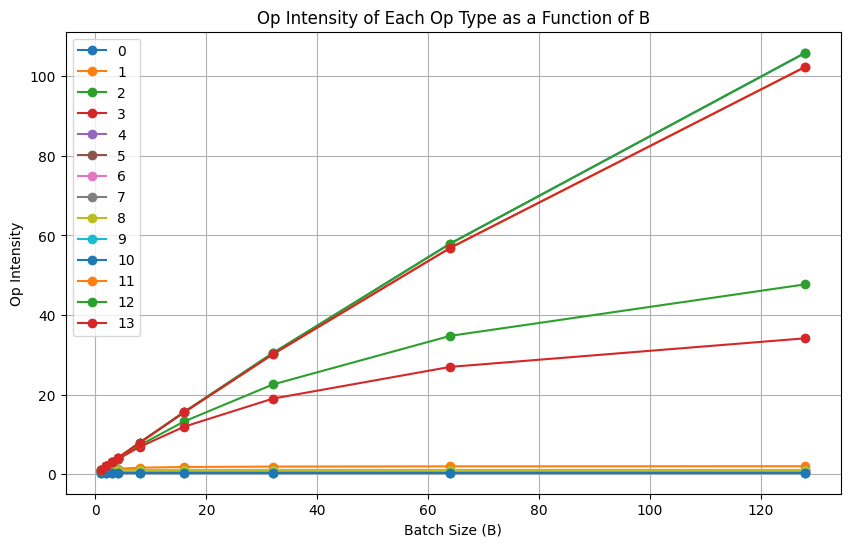

In [9]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store Op Intensity for each Op Type
op_intensity_data = {op_idx: [] for op_idx in range(len(model_df))}

# Vary B from 1 to 128
batch_sizes = [1,2,3,4,8,16,32,64,128]
for B in batch_sizes:
    model_df = get_model_df(model_decode, system, batch_size=B, model_characterstics=True)
    for op_idx in range(len(model_df)):
        subset = model_df.loc[op_idx]
        op_intensity_data[op_idx].append(subset['Op Intensity'])

# Plotting
plt.figure(figsize=(10, 6))
for op_type, intensities in op_intensity_data.items():
    plt.plot(batch_sizes, intensities, marker='o', linestyle='-', label=op_type)

plt.xlabel('Batch Size (B)')
plt.ylabel('Op Intensity')
plt.title('Op Intensity of Each Op Type as a Function of B')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
model_df

,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB)
0,GEMM,"[((128, 768, 1), (3072, 768), (128, 3072, 1))]",105.931034,301.989888,0.09375,2.25,0.375,2.71875
1,CONV1D,"((128, 1, 1536), (1536, 1, 4), (128, 1, 1536))",1.969231,0.786432,0.1875,0.005859,0.1875,0.380859
2,GEMM,"[((128, 1536, 1), (80, 1536), (128, 80, 1))]",47.701863,15.72864,0.1875,0.117188,0.009766,0.314453
3,GEMM,"[((128, 48, 1), (1536, 48), (128, 1536, 1))]",34.133333,9.437184,0.005859,0.070312,0.1875,0.263672
4,Einsum,"([128, 1536, 1], [1536, 16], [128, 1536, 1, 16])",0.934307,3.145728,0.1875,0.023438,3.0,3.210938
5,Einsum,"([128, 1536, 1], [128, 1, 16], [128, 1536, 1, ...",0.9406,3.145728,0.1875,0.001953,3.0,3.189453
6,Einsum,"([128, 1536, 1, 16], [128, 1536, 1], [128, 153...",0.484848,3.145728,3.0,0.1875,3.0,6.1875
7,Einsum,"([128, 1536, 16], [128, 1536, 16], [128, 1536,...",0.333333,3.145728,3.0,3.0,3.0,9.0
8,Einsum,"([128, 1536, 16], [128, 16], [128, 1536])",0.9406,3.145728,3.0,0.001953,0.1875,3.189453
9,Einsum,"([128, 1, 1536], [128, 1, 1536], [128, 1, 1536])",0.333333,0.196608,0.1875,0.1875,0.1875,0.5625
